# Limpieza de datos

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [34]:
files = os.listdir('../data_csv')
print(f'Cantidad de archivos: {len(files)}')

Cantidad de archivos: 22


In [35]:
total_filas = 0
columnas = []
for f in files:
    data = pd.read_csv(f'../data_csv/{f}', sep=';', encoding='latin1', header=1)
    # Filas, columnas, datos nulos, tipo de datos
    print(f'Archivo: {f}')
    print(f'Filas: {data.shape}\n')
    print(f'Nulos: {data.isnull().sum()}\n')
    print(data.dtypes)
    print("\n\n")

    total_filas += data.shape[0]

    

Archivo: altaverapaz.csv
Filas: (377, 17)

Nulos: CODIGO              1
DISTRITO            5
DEPARTAMENTO        3
MUNICIPIO           3
ESTABLECIMIENTO     3
DIRECCION           5
TELEFONO           23
SUPERVISOR          5
DIRECTOR           19
NIVEL               3
SECTOR              3
AREA                3
STATUS              3
MODALIDAD           3
JORNADA             3
PLAN                3
DEPARTAMENTAL       3
dtype: int64

CODIGO             object
DISTRITO           object
DEPARTAMENTO       object
MUNICIPIO          object
ESTABLECIMIENTO    object
DIRECCION          object
TELEFONO           object
SUPERVISOR         object
DIRECTOR           object
NIVEL              object
SECTOR             object
AREA               object
STATUS             object
MODALIDAD          object
JORNADA            object
PLAN               object
DEPARTAMENTAL      object
dtype: object



Archivo: baja_verapaz.csv
Filas: (116, 17)

Nulos: CODIGO             1
DISTRITO           3
DEPARTAMEN

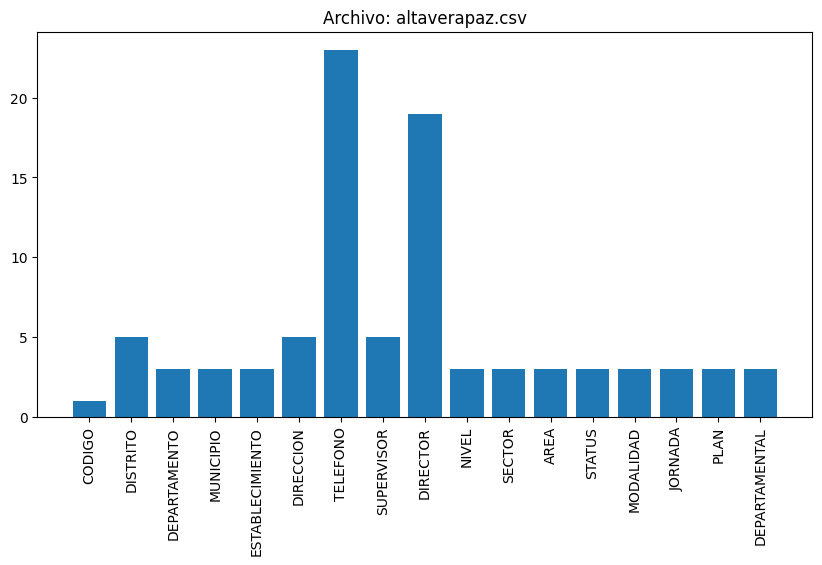

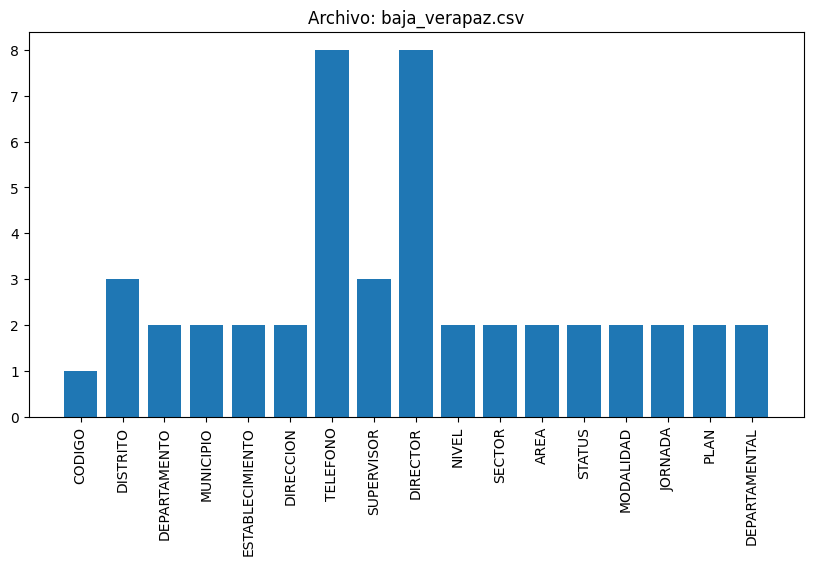

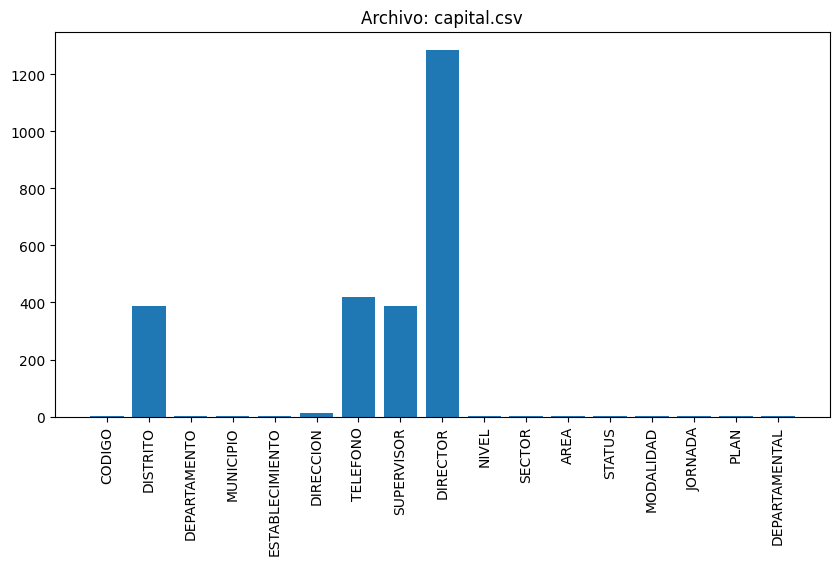

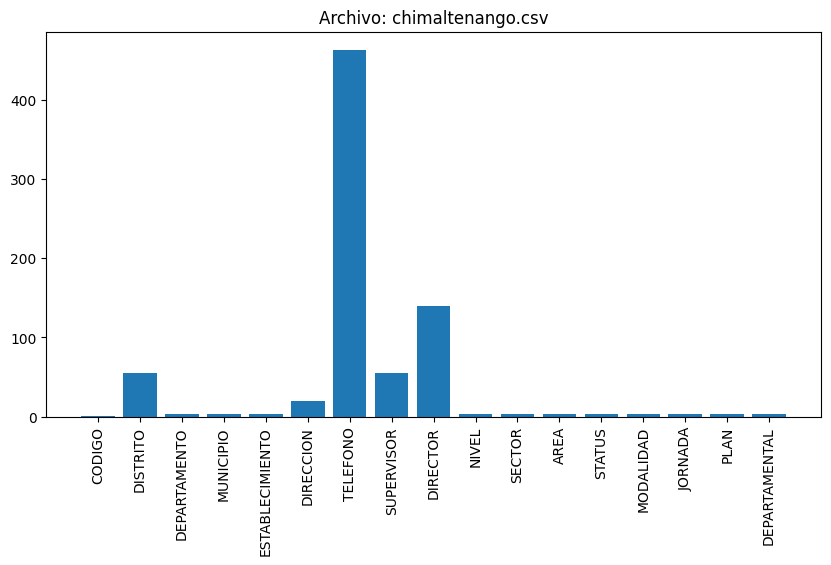

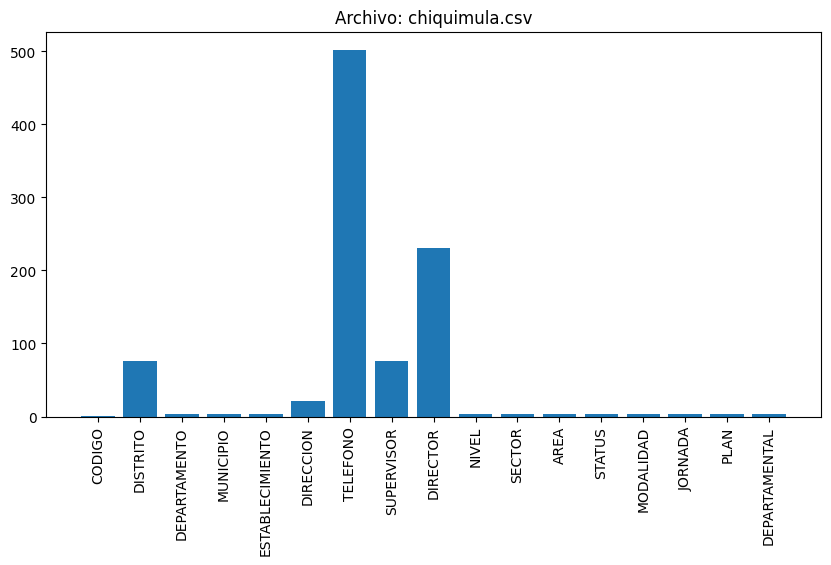

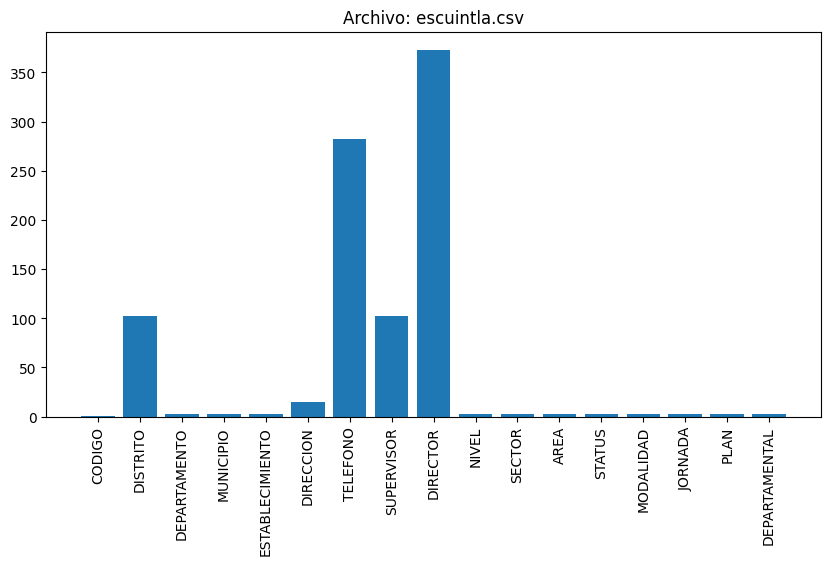

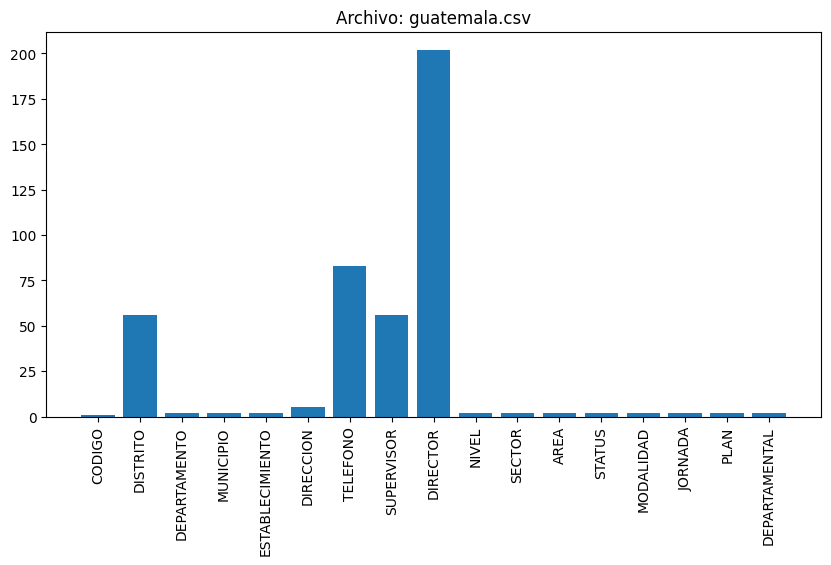

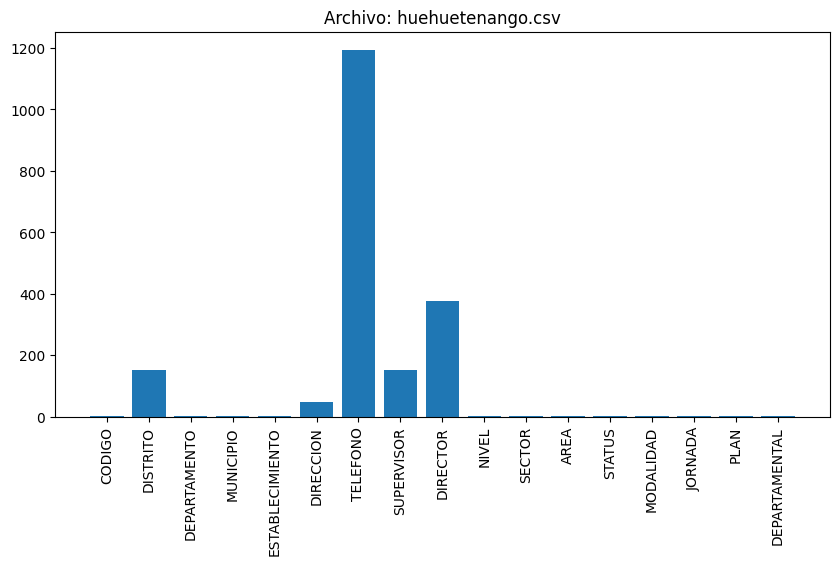

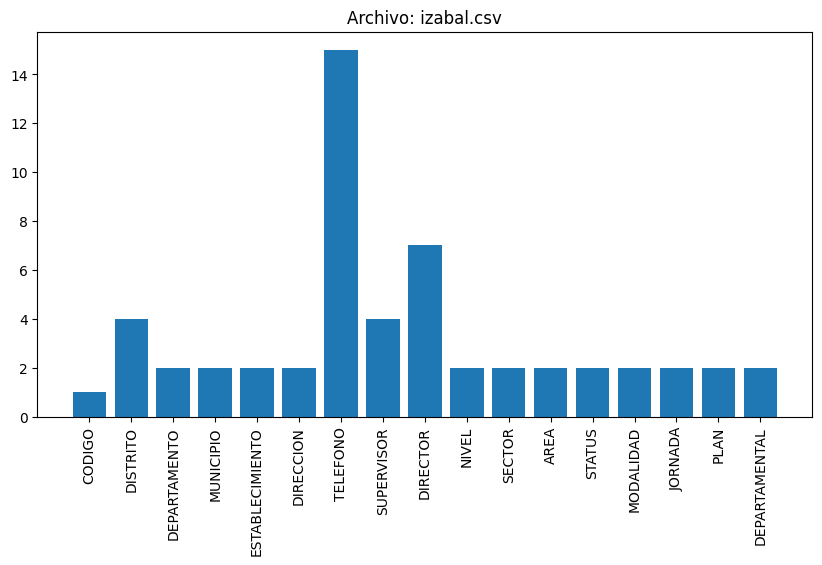

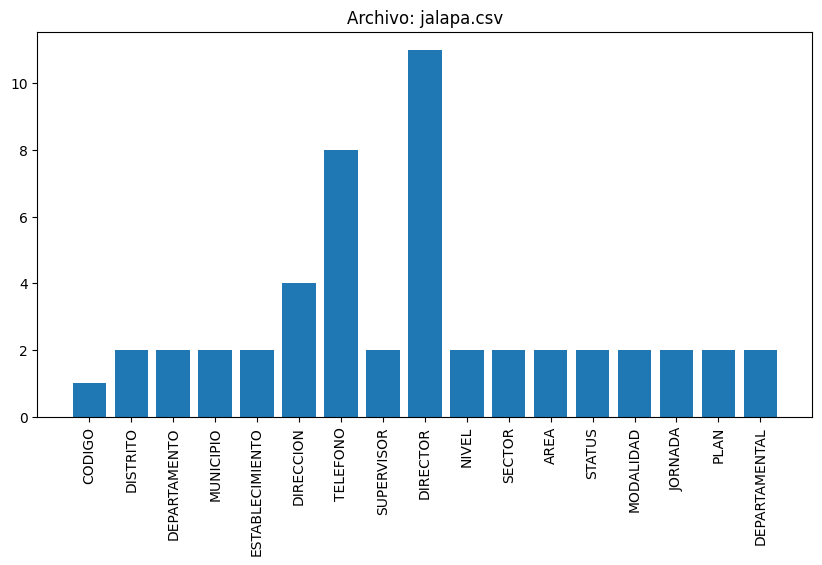

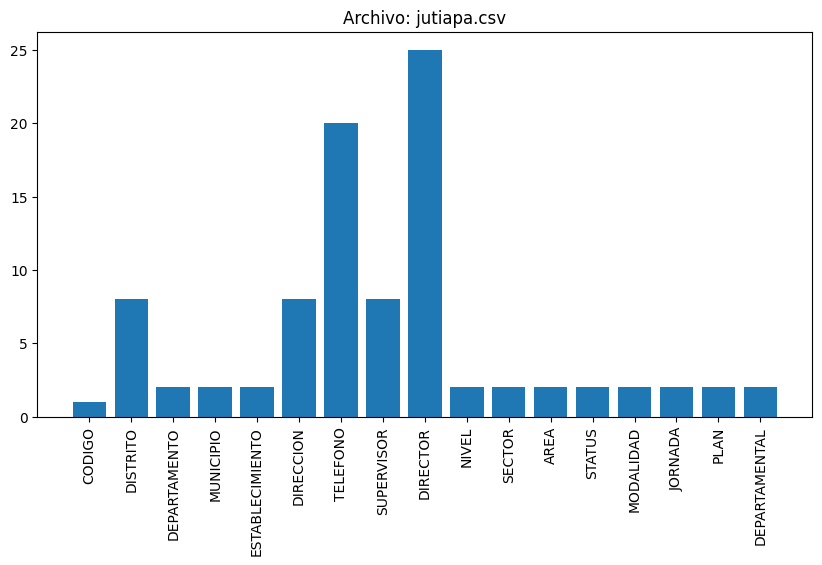

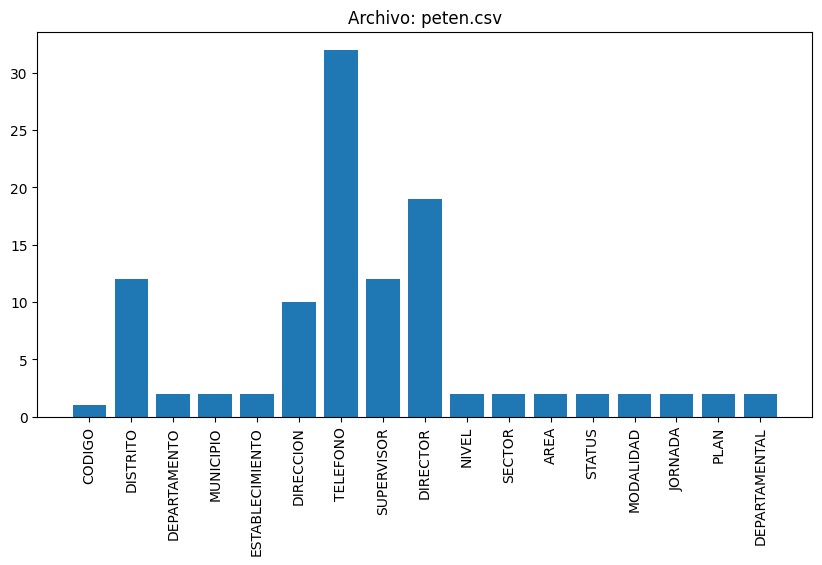

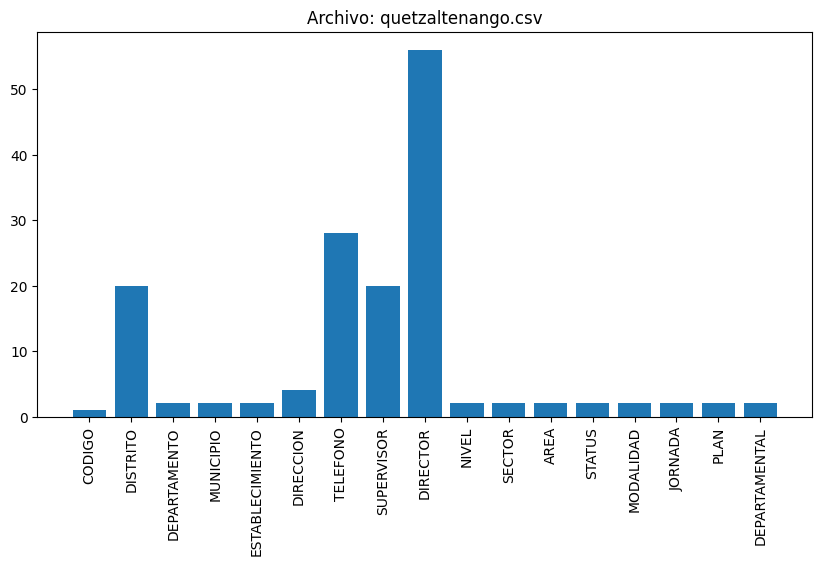

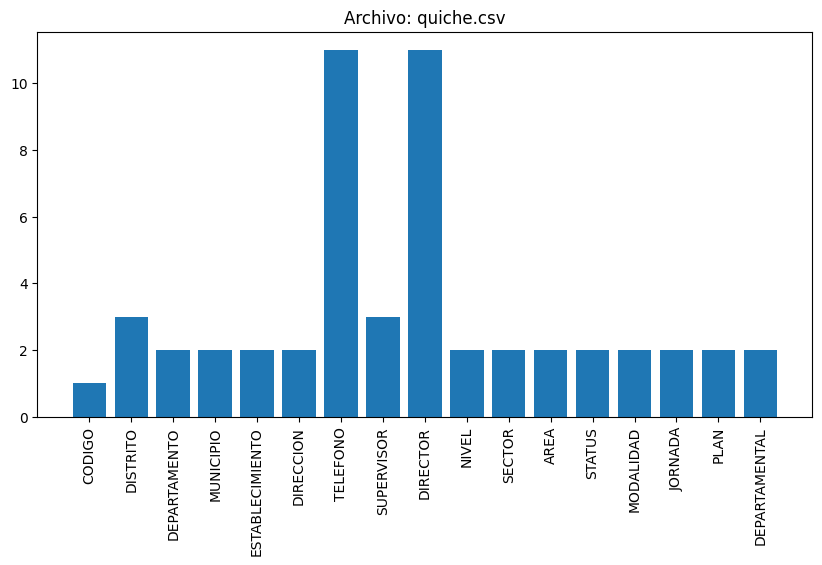

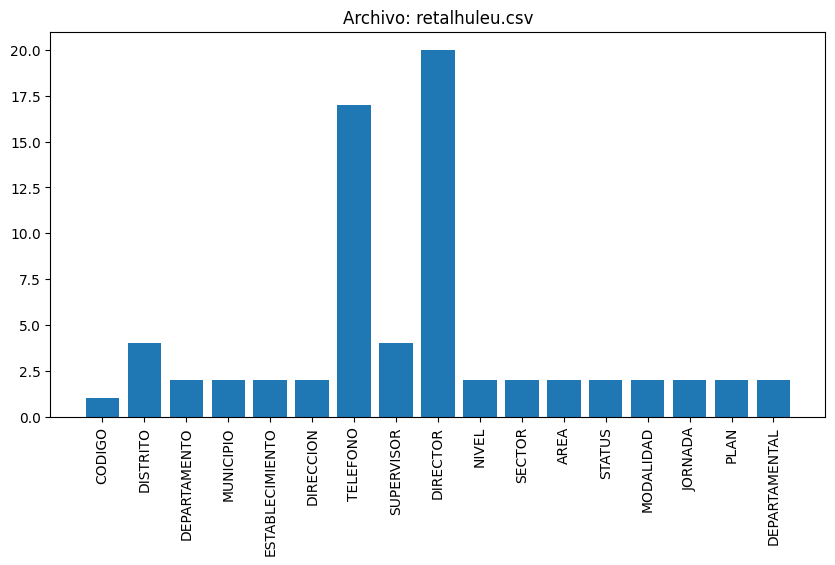

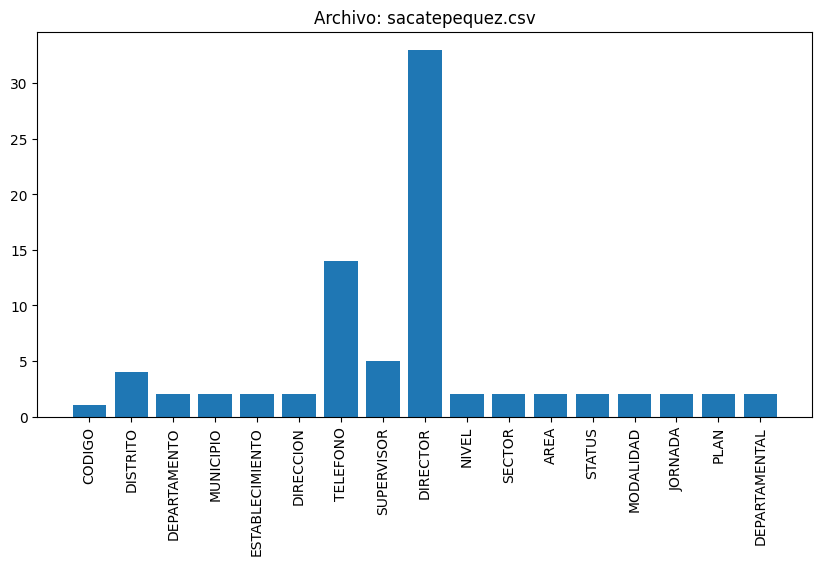

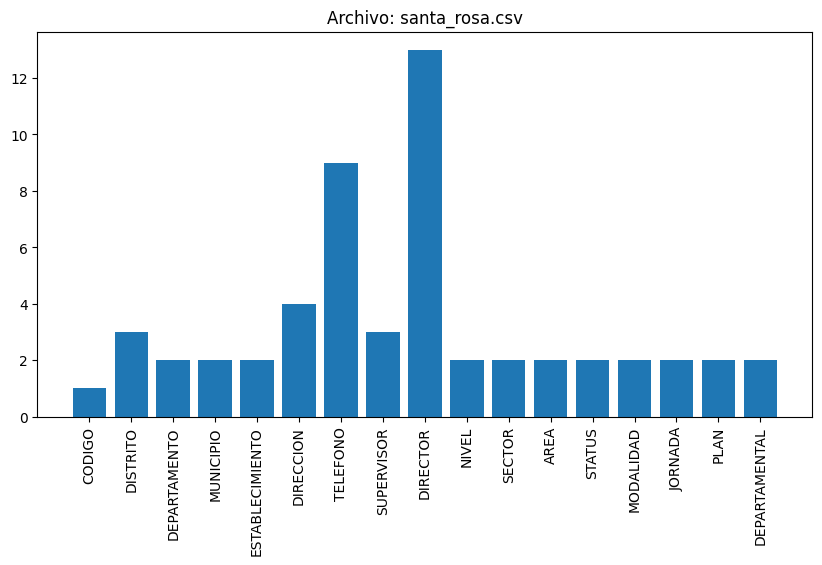

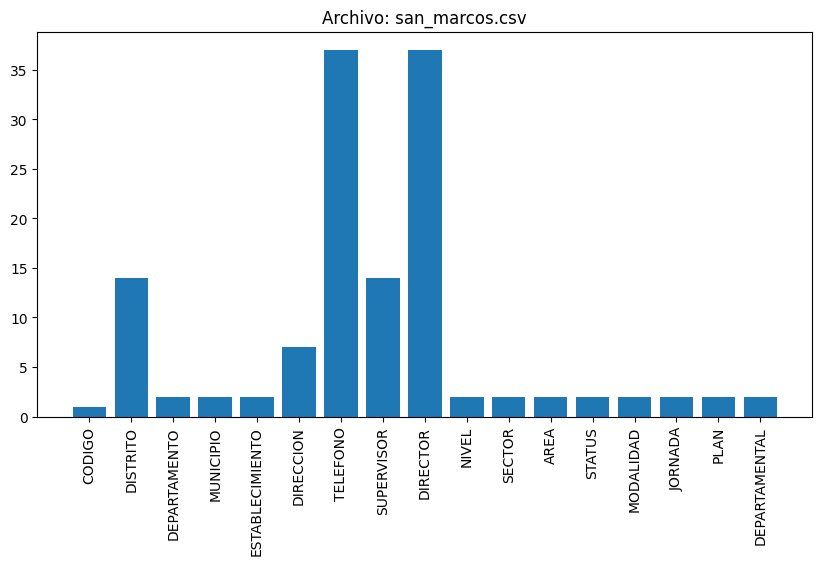

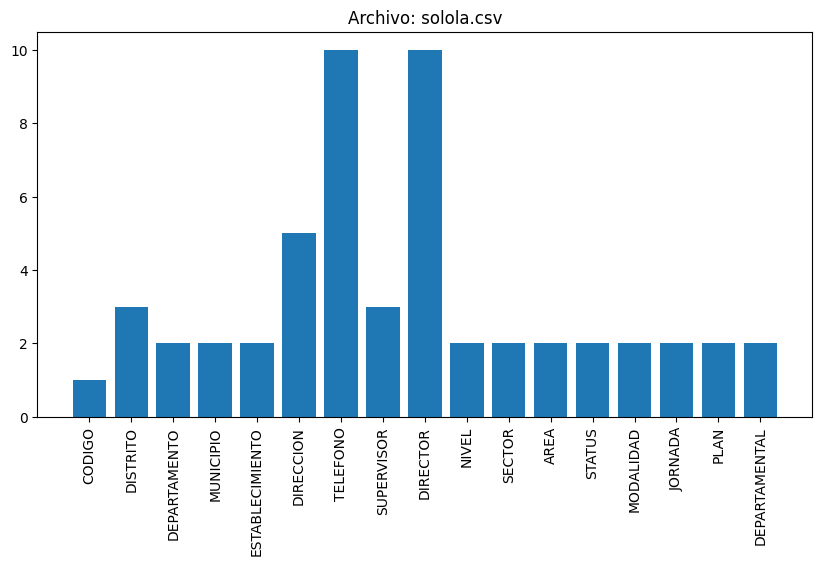

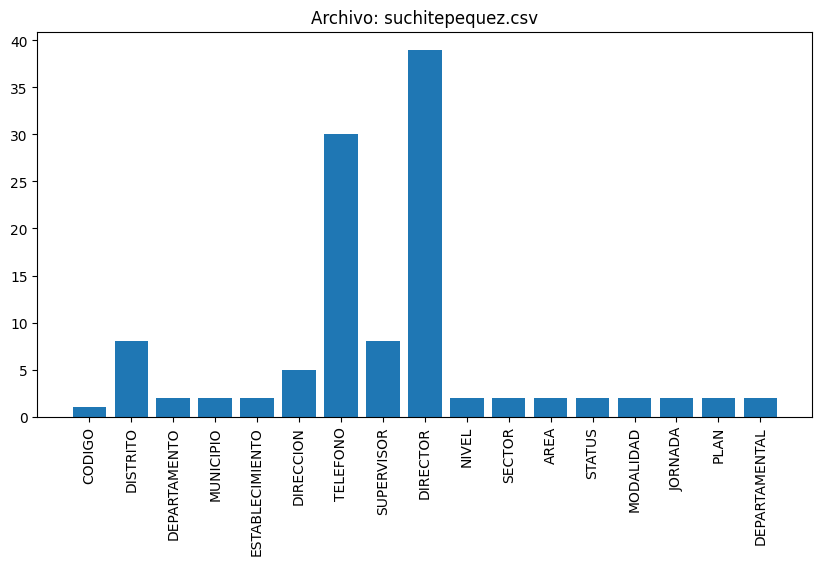

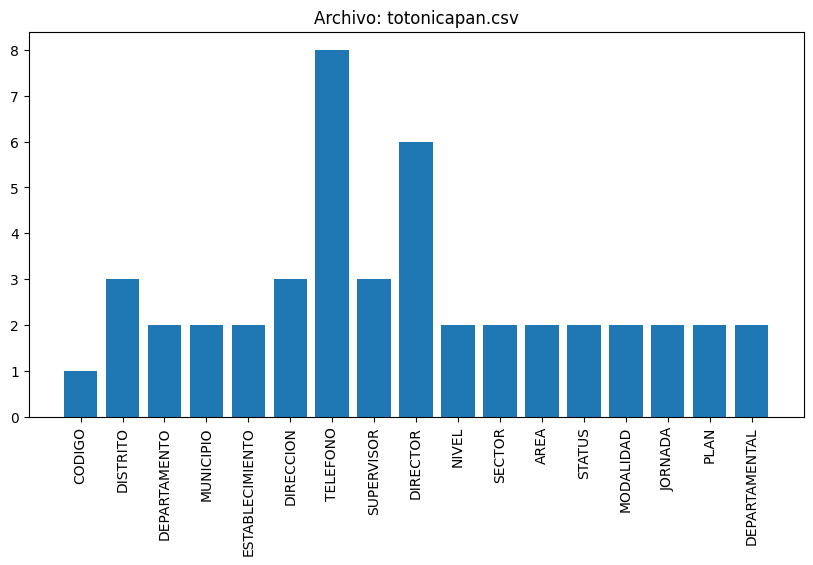

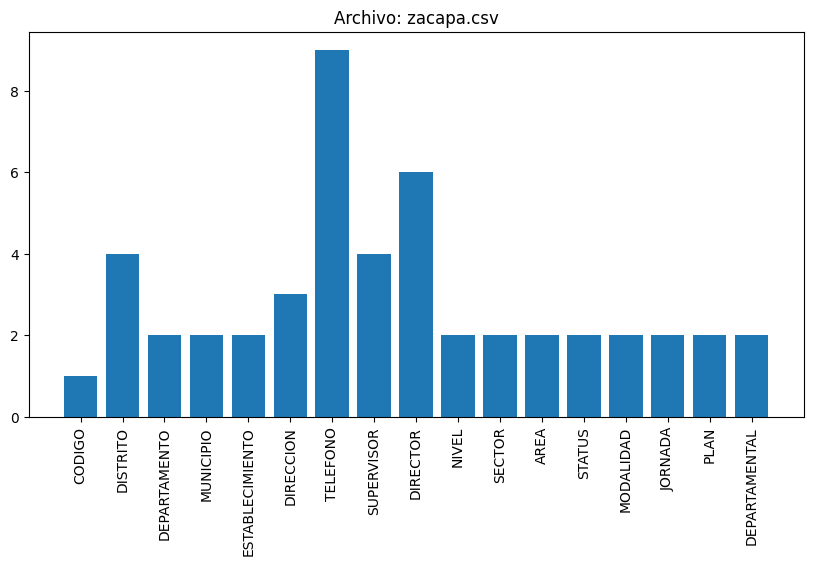

In [36]:
   
# graficar la cantidad de datos nulos por columna y archivo

for f in files:
    data = pd.read_csv(f'../data_csv/{f}', sep=';', encoding='latin1', header=1)
    plt.figure(figsize=(10, 5))
    plt.bar(data.columns, data.isnull().sum())
    plt.title(f'Archivo: {f}')
    plt.xticks(rotation=90)
    plt.show()

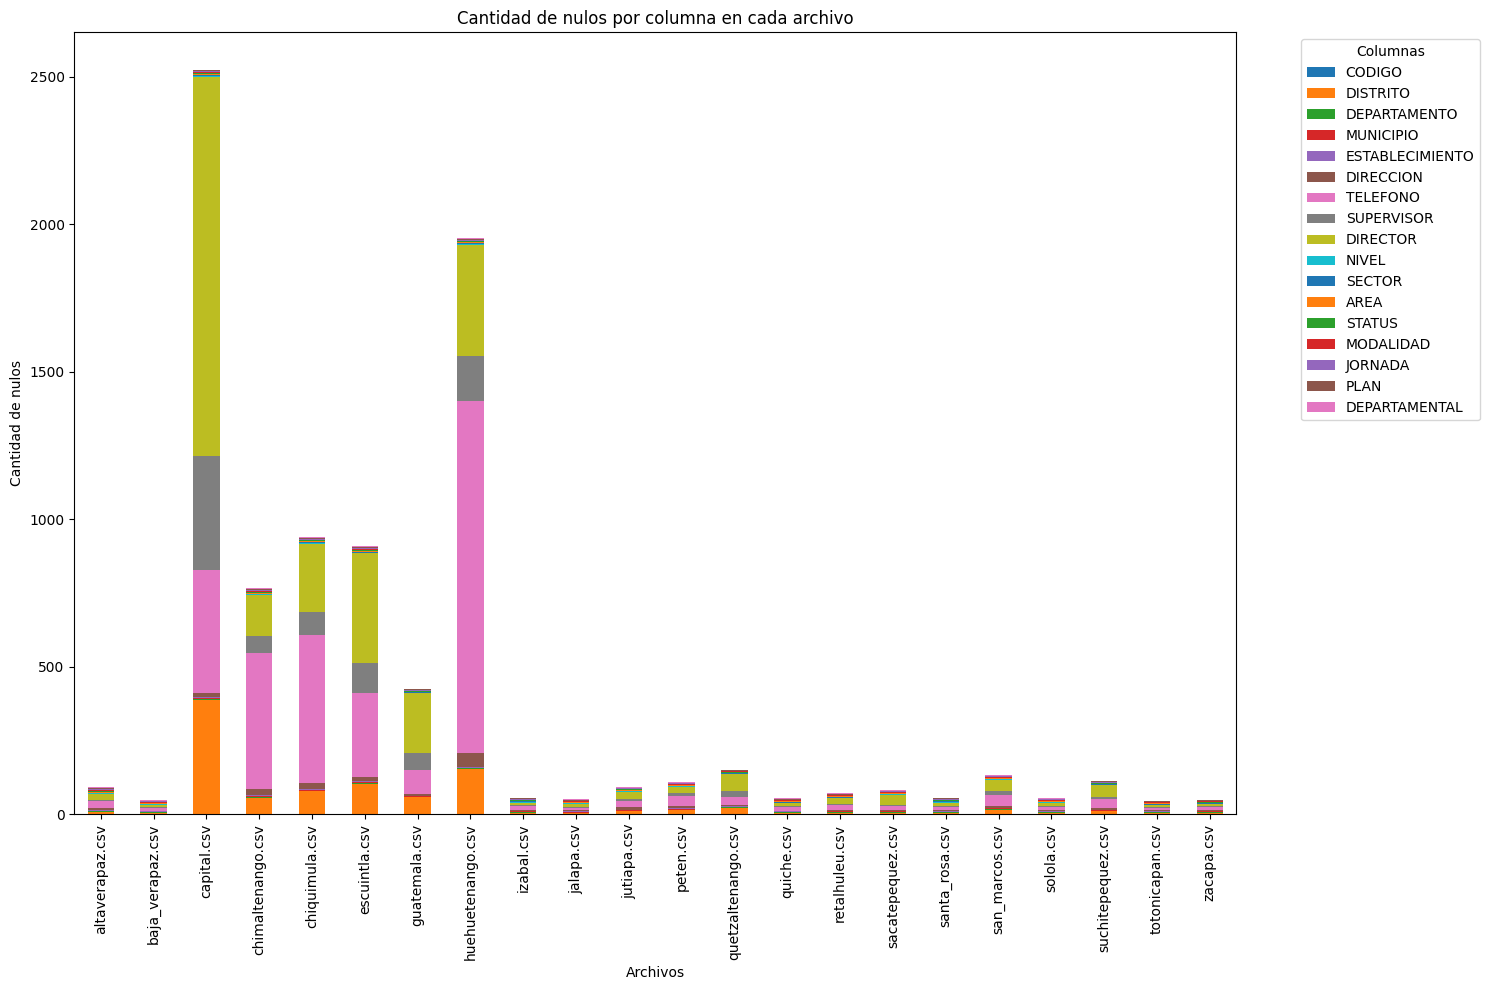

In [37]:
data_dir = '../data_csv'

files = os.listdir(data_dir)

null_counts = {}

for f in files:
    data = pd.read_csv(f'{data_dir}/{f}', sep=';', encoding='latin1', header=1)
    null_counts[f] = data.isnull().sum()

null_counts_df = pd.DataFrame(null_counts)

null_counts_df = null_counts_df.T

null_counts_df.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Cantidad de nulos por columna en cada archivo')
plt.xlabel('Archivos')
plt.ylabel('Cantidad de nulos')
plt.legend(title='Columnas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Generación de un solo archivo de datos

In [38]:
newData = pd.concat([pd.read_csv(f'../data_csv/{f}', sep=';', encoding='latin1', header=1) for f in files])

newData.to_csv('../data_csv/total.csv', sep=';', index=False)

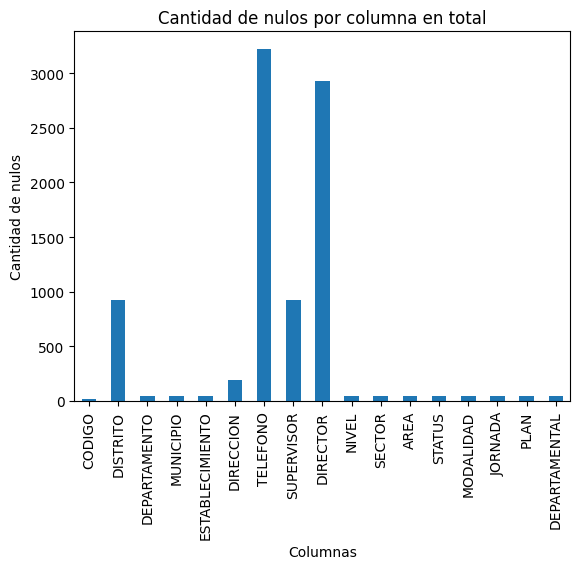

In [40]:
newData.isnull().sum().plot(kind='bar')
plt.title('Cantidad de nulos por columna en total')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de nulos')
plt.show()


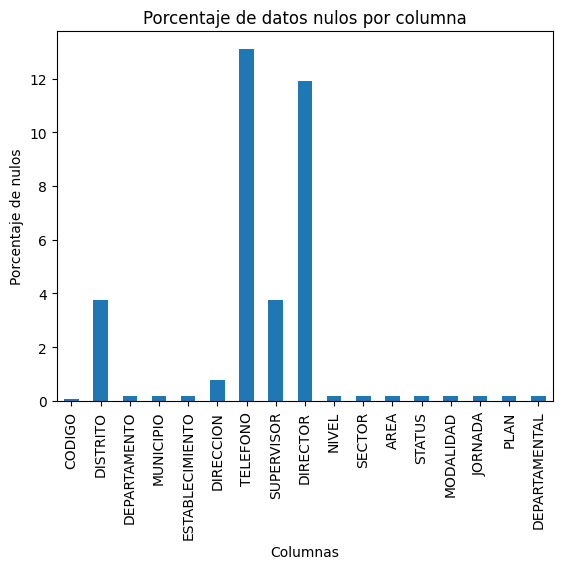

In [41]:
null_percent = newData.isnull().sum() / newData.shape[0] * 100
null_percent.plot(kind='bar')
plt.title('Porcentaje de datos nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de nulos')
plt.show()